In [1]:
import zipfile

path = "../data/nhs_waiting_times.csv"

print("Is this a zip file?", zipfile.is_zipfile(path))


Is this a zip file? False


In [2]:
import os
print("Current working directory:", os.getcwd())
print("Files here:", os.listdir())

Current working directory: C:\Users\Alex\Documents\ai-data-cyber-path\ai-data-cyber-path\notebooks
Files here: ['.ipynb_checkpoints', '00_setup_test.ipynb', 'day1_nhs_waiting_times.ipynb']


In [3]:
import pandas as pd

path = "../data/nhs_waiting_times.xlsx"

df = pd.read_excel(
    path,
    sheet_name="Table 1",
    header=2
)

df.head()

,Organisation Type,Organisation Name,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25,Nov-25,Dec-25,Jan-26,Feb-26,Mar-26
0,NaN,England,4,5,2,1,4,2,2,NaN,NaN,NaN,NaN,NaN
1,Region,East Of England,0,1,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
2,Region,London,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,Region,Midlands,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,Region,North East And Yorkshire,0,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Keep only regional rows
regions = df[df["Organisation Type"] == "Region"].copy()

# Month columns start at column 2 (after Organisation Type + Organisation Name)
month_columns = regions.columns[2:]

# Total missing submissions across the available months
regions["Total Missing Submissions"] = regions[month_columns].sum(axis=1, skipna=True)

# Rank regions by total missing submissions
regions_sorted = regions[["Organisation Name", "Total Missing Submissions"]].sort_values(
    by="Total Missing Submissions",
    ascending=False
)

regions_sorted

,Organisation Name,Total Missing Submissions
5,North West,10.0
3,Midlands,3.0
6,South East,3.0
1,East Of England,2.0
2,London,1.0
4,North East And Yorkshire,1.0
7,South West,0.0


### Missing submissions by region (Apr–Oct 2025)

This chart shows the total number of missing Community Health Services submissions by region
across the available reporting months in this dataset (April–October 2025).

Higher values mean organisations in that region failed to submit data more often.

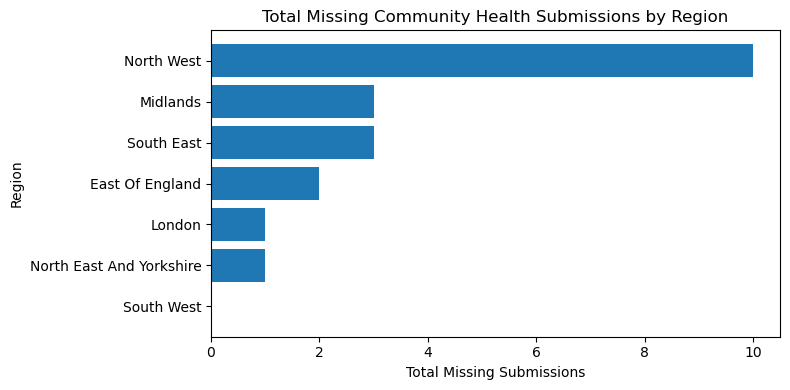

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(
    regions_sorted["Organisation Name"],
    regions_sorted["Total Missing Submissions"]
)
plt.xlabel("Total Missing Submissions")
plt.ylabel("Region")
plt.title("Total Missing Community Health Submissions by Region")
plt.gca().invert_yaxis()  # puts the highest at the top
plt.tight_layout()
plt.show()